Check the input file for issues, so far I see the following
(1) do they list any league more than once?
(2) should I ask about more options?
(3) do they want to curl in more open leagues than they list?

In [1]:
import pandas as pd
import numpy as np
import random
import math
import csv
import os.path
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#updated 8/30/2016 to use file from website
fName = 'BackupList_Registrations.csv' 
importInfo=pd.read_csv(fName)

In [3]:
openLeagues = ['Sunday Night', 'Monday 4PM', 'Monday Night',
               'Tuesday 4PM','Wednesday 4PM','Thursday 4PM'] #updated to match the priority list
otherLeagues = ['League_4_Men', 'League_7_Ladies' ,'League_Scrod']
priorities = ['League_Pri_1','League_Pri_2','League_Pri_3','League_Pri_4','League_Pri_5','League_Pri_6']

regInfo = importInfo.loc[:,(['firstname','lastname','email','League_Number_Open'] + otherLeagues)]

for item in openLeagues:
    regInfo[item] = np.nan

nPeople = len(regInfo.index)
for idx in range(0,nPeople):
    for idxP in enumerate(priorities):
        #remember: enumerate will allow idxP[0] is the number, while idxP[1] is the value
        getOne = importInfo.loc[idx,idxP[1]]
        if getOne != 'None':
            regInfo.loc[idx,getOne] = idxP[0] + 1  #want 1,2,3 and not python zero index

In [4]:
countFirst = {}
for name in openLeagues:
    countFirst[name] = len(regInfo.loc[regInfo[name]==1])

countFirst

{'Monday 4PM': 5,
 'Monday Night': 12,
 'Sunday Night': 10,
 'Thursday 4PM': 12,
 'Tuesday 4PM': 7,
 'Wednesday 4PM': 6}

In [5]:
countSecond = {}
for name in openLeagues:
    countSecond[name] = len(regInfo.loc[regInfo[name]==2])

countSecond

{'Monday 4PM': 10,
 'Monday Night': 2,
 'Sunday Night': 0,
 'Thursday 4PM': 7,
 'Tuesday 4PM': 3,
 'Wednesday 4PM': 9}

In [6]:
countThird = {}
for name in openLeagues:
    countThird[name] = len(regInfo.loc[regInfo[name]==3])

countThird

{'Monday 4PM': 8,
 'Monday Night': 0,
 'Sunday Night': 0,
 'Thursday 4PM': 4,
 'Tuesday 4PM': 4,
 'Wednesday 4PM': 4}

In [7]:
countFourth = {}
for name in openLeagues:
    countFourth[name] = len(regInfo.loc[regInfo[name]==4])

countFourth

{'Monday 4PM': 1,
 'Monday Night': 0,
 'Sunday Night': 0,
 'Thursday 4PM': 1,
 'Tuesday 4PM': 3,
 'Wednesday 4PM': 3}

In [8]:
countFifth = {}
for name in openLeagues:
    countFifth[name] = len(regInfo.loc[regInfo[name]==5])

countFifth

{'Monday 4PM': 0,
 'Monday Night': 0,
 'Sunday Night': 2,
 'Thursday 4PM': 0,
 'Tuesday 4PM': 0,
 'Wednesday 4PM': 0}

In [9]:
countSixth = {}
for name in openLeagues:
    countSixth[name] = len(regInfo.loc[regInfo[name]==6])

countSixth

{'Monday 4PM': 0,
 'Monday Night': 0,
 'Sunday Night': 0,
 'Thursday 4PM': 0,
 'Tuesday 4PM': 0,
 'Wednesday 4PM': 0}

In [10]:
len(regInfo)

60

In [177]:
tData = regInfo.replace(to_replace='None', value=0)

In [180]:
tData.groupby(by = 'League_Number_Open').mean()

,Sunday Night,Monday 4PM,Monday Night,Tuesday 4PM,Wednesday 4PM,Thursday 4PM
League_Number_Open,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.666667,2.333333,1.0,1.400000,1.700000,1.4
2,2.000000,2.000000,2.0,2.555556,2.625000,2.0
3,NaN,2.666667,2.0,1.000000,2.333333,1.5
4,NaN,1.000000,NaN,2.000000,3.000000,4.0


In [184]:
tData.loc[:,'League_Number_Open'].value_counts()

1    33
2    12
0     8
3     4
4     1
Name: League_Number_Open, dtype: int64

In [186]:
toPlot = tData.loc[:,'League_Number_Open'].value_counts()

In [187]:
type(toPlot)

pandas.core.series.Series

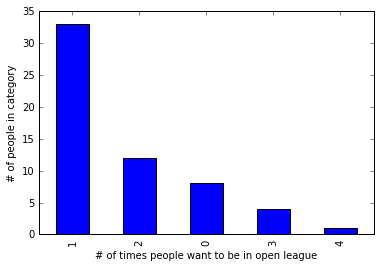

In [194]:
toPlot.plot(kind = 'bar')
plt.xlabel('# of times people want to be in open league')
plt.ylabel('# of people in category')

In [5]:
regInfo.loc[idx,openLeagues]

Sunday Night     NaN
Monday 4PM         1
Monday Night     NaN
Tuesday 4PM      NaN
Wednesday 4PM    NaN
Thursday 4PM     NaN
Name: 1, dtype: object

In [7]:
regInfo.loc[idx,openLeagues].count()

1

In [8]:
regInfo.loc[idx,openLeagues].isnull().sum()

5

In [79]:
idx
tData = importInfo.loc[idx,priorities]

In [82]:
r = tData=='None'

In [90]:
testNpriority = tData[-r].value_counts()

In [91]:
testNpriority

Monday 4PM    1
Name: 1, dtype: int64

In [100]:
for idx in range(0,len(importInfo)):
    tData = importInfo.loc[idx,priorities]
    r = tData == 'None'
    testNpriority = tData[-r].value_counts()
#     if testNpriority.index[0] > 1:
#         print 'issue'
#     else:
#         print 'ok'

issue
issue


In [101]:
idx = 1

In [102]:
tData = importInfo.loc[idx,priorities]
r = tData == 'None'
testNpriority = tData[-r].value_counts()


In [103]:
testNpriority

Monday 4PM    1
Name: 1, dtype: int64

In [104]:
if testNpriority.index[0]> 1:
    print 'issue'

issue


In [106]:
testNpriority > 1

Monday 4PM    False
Name: 1, dtype: bool

In [73]:
for idx in range(0,len(importInfo)):
    testNpriority = importInfo.loc[idx,priorities].value_counts()
    print testNpriority
    for item in range(0,len(testNpriority)):
        if testNpriority.index[item] != 'None':
            if len(testNpriority.index[item]) > 1:
                print 'duplicate priorities'
            else:
                print 'no issue'

None          4
Monday 4PM    2
Name: 0, dtype: int64
None          5
Monday 4PM    1
Name: 1, dtype: int64


In [77]:
testNpriority = importInfo.loc[idx,priorities].value_counts()

In [71]:
importInfo.loc[0,priorities].value_counts()

None          4
Monday 4PM    2
Name: 0, dtype: int64

In [72]:
importInfo.loc[1,priorities].value_counts()

None          5
Monday 4PM    1
Name: 1, dtype: int64

In [23]:
type(importInfo.loc[idx,priorities].value_counts())

pandas.core.series.Series

In [16]:
idx = 0

pandas.core.series.Series

In [17]:
##now...check the file, does anyone prioritize the same league more than once?

In [9]:
idx = 0

In [13]:
importInfo.loc[idx, priorities]

League_Pri_1    Monday 4PM
League_Pri_2    Monday 4PM
League_Pri_3          None
League_Pri_4          None
League_Pri_5          None
League_Pri_6          None
Name: 0, dtype: object

In [14]:
un = importInfo.loc[idx, priorities]

In [15]:
un.unique

<bound method Series.unique of League_Pri_1    Monday 4PM
League_Pri_2    Monday 4PM
League_Pri_3          None
League_Pri_4          None
League_Pri_5          None
League_Pri_6          None
Name: 0, dtype: object>

In [16]:
un.sort_values()

League_Pri_1    Monday 4PM
League_Pri_2    Monday 4PM
League_Pri_3          None
League_Pri_4          None
League_Pri_5          None
League_Pri_6          None
Name: 0, dtype: object